# Predictive Analytics: Penyakit *Stroke*


---

Oleh: [Sinta Siti Nuriah](https://www.linkedin.com/in/sintasitinuriah/)

![stroke](https://ners.unair.ac.id/site/images/Lihat/20_stroke.png)

## Latar Belakang Masalah
---
Menurut Organisasi Kesehatan Dunia (WHO), *stroke* merupakan penyebab kematian terbanyak ke-2 di dunia, yang bertanggung jawab atas sekitar 11% dari total kematian.

Di Indonesia, *stroke* menjadi penyebab utama kecacatan dan kematian, yakni sebesar 11,2% dari total kecacatan dan 18,5% dari total kematian. Menurut data Survei Kesehatan Indonesia tahun 2023, prevalensi stroke di Indonesia mencapai 8,3 per 1.000 penduduk. Stroke juga merupakan salah satu penyakit katastropik dengan pembiayaan tertinggi ketiga setelah penyakit jantung dan kanker, yaitu mencapai Rp5,2 triliun pada 2023.


Upaya Kementerian Kesehatan (Kemenkes) dalam meminimalisir penyakit *stroke* dengan meningkatkan deteksi dini dislipidemia pada pasien diabetes melitus dan hipertensi sebagai upaya pencegahan *stroke*, dengan target pada 2024 sebesar 90% atau sekitar 10,5 juta penduduk. Namun, saat ini capaian deteksi dini stroke baru mencapai sekitar 11,3% dari target.

## Deskripsi Proyek
---
Proyek ini bertujuan untuk memaksimalkan upaya pemerintah dalam meminimalisir penyakit *stroke* dengan capaian deteksi sejak dini. Maka model *machine learning* terkiat *predictive analysis* penyakit *stroke* diharapkan dapat membantu dalam memprediksi penyakit *stroke* sejak dini.

Dataset yang digunakan dalam proyek ini berterkaitan dengan seorang pasien yang kemungkinan terkena stroke berdasarkan parameter input seperti jenis kelamin, usia, berbagai penyakit, dan status merokok. Setiap baris dalam data memberikan informasi yang relevan tentang pasien.

# 1. Business Understanding
## Problem Statments
1. Tingginya angka kematian dan kecacatan akibat *stroke* di Indonesia, menjadikannya salah satu beban kesehatan utama secara nasional.
2. Capaian deteksi dini terhadap faktor risiko *stroke* seperti dislipidemia pada penderita diabetes melitus dan hipertensi masih sangat rendah (11,3%) dibandingkan target Kemenkes tahun 2024 (90%).
3. Kurangnya sistem prediksi atau skrining berbasis data untuk mengidentifikasi individu dengan risiko *stroke* tinggi secara lebih cepat dan efisien.

## Goals
1. Membangun prediksi yang mampu mengidentifikasi potensi *stroke* pada individu berdasarkan data klinis seperti hipertensi, kadar glukosa, kolesterol, usia, dan faktor risiko lainnya.
2. Meningkatkan efektivitas deteksi dini *stroke* secara otomatis menggunakan pendekatan *machine learning*, sehingga dapat membantu pemerintah atau lembaga kesehatan mempercepat capaian target 90%.
3. Menyediakan solusi berbasis data yang terukur dan dapat diintegrasikan ke dalam sistem pelayanan kesehatan.


## Solution Statement
Solusi 1: Membangun model klasifikasi baseline untuk prediksi stroke menggunakan algoritma seperti:
* Logistic Regression
* Decision Tree Classifier  

 Model ini akan digunakan sebagai baseline dengan metrik evaluasi seperti: Akurasi, Precision, Recall, dan F1-Score, khususnya pada kelas positif (stroke).

Solusi 2: Melakukan improvement dengan algoritma yang lebih kompleks, yaitu:
* XGBoost

  Model ini akan di-tuning menggunakan  Random Search untuk mengoptimalkan performa. Metrik evaluasi utama tetap fokus pada Recall, karena kesalahan negatif (false negative) dalam deteksi stroke harus diminimalisir.

Solusi 3:
Melakukan feature engineering seperti:
* Normalisasi data numerik (age, avg_glucose_level, BMI, dll.)
* Encoding variabel kategorik (gender, work_type, dll.)
* Handling imbalance data

# 2. Data Understanding

#### Data Understanding merupakan proses memahami impormasi dalam data dan menentukan kualitas dari tersebut.

## 2.1 Data Loading
#### Data loading merupakan tahapan untuk memuat dataset yang digunakan adat mudah dipahami. Informasi dataset telah dibersihkan dan dinormalisasi terlebih dahulu oleh pembuat, sehingga mudah digunakan dan dimanfaat oleh khalayak banyak.

---
### **Informasi Datasets**

|Jenis          |Keterangan                                         |
|---------------|---------------------------------------------------|
|Title          |Stroke Prediction Dataset                          |
|Source         |[Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)|
|License        |Data files © Original Authors                      |
|Visibility     |Public                                             |
|Tags           |Health, Health Conditions, Healthcare, Public Health, Binary Classification |
|Usability      |10.00                                              |

---
#### Attribute Information
|Attribute        |Describe                                                   |
|-----------------|-----------------------------------------------------------|
|id               |Unique identifier                                          |
|gender           |"Male", "Female", or "Order"                               |
|age              |age of the patient                                         |
|hypertenstion    |0 if the patient doesn't have hypertension, 1 if the patient has hypertension|
|heart_disease    | 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease|
|ever_married     |"No" or "Yes"                                              |
|work_type        |"children", "Govt_jov", "Never_worked", "Private" or "Self-employed"   |
|Residence_type   |"Rural" or "Urban"                                         |
|avg_glucose_level|average glucose level in blood                             |
|bmi              |body mass index                                            |
|smoking_status   |"formerly smoked", "never smoked", "smokes" or "Unknown"   |
|stroke           |1 if the patient had a stroke or 0 if not                  |

### Import Library yang dibutuhkan

In [1]:
!pip install -q kaggle

In [76]:
# Import load data library

from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from imblearn.combine import SMOTETomek
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading data

In [4]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/Colab\ Notebooks/MLT/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
License(s): copyright-authors


In [6]:
!unzip /content/stroke-prediction-dataset.zip

Archive:  /content/stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


In [7]:
df_stroke = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [8]:
df_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Output Kode diatas memberikan informasi sebagai berikut:
*   Ada 5.110 baris (record atau jumlah pengamatan dalam dataset)
*   Terdapat 12 kolom id, age, hypertension, heart_disease, avg_glucose_level, bmi, stroke, gender, ever_married, work_type, Residence_type dan smoking_status



## 2.2 Exploratory Data Analysis (EDA)

##### Exploratory data analysis merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data. Teknik ini biasanya menggunakan bantuan statistik dan representasi grafis atau visualisasi.

### 2.2.1 EDA - Deskripsi Variabel

Berdasarkan informasi dari [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset), variabel-variabel pada Diamond dataset adalah sebagai berikut:
1. id: Identitas unik untuk setiap pasien.
2. gender: Jenis kelamin pasien, dengan kemungkinan nilai: "Male" (laki-laki), "Female" (perempuan), atau "Other" (lainnya).
3. age: Usia pasien (dalam tahun).
4. hypertension: Status hipertensi pasien, dengan nilai:
    * 0: Tidak memiliki hipertensi
    * 1: Memiliki hipertensi
5. heart_disease: Status penyakit jantung pasien, dengan nilai:
    * 0: Tidak memiliki penyakit jantung
    * 1: Memiliki penyakit jantung
6. ever_married: Status pernikahan pasien, dengan nilai "Yes" (sudah menikah) atau "No" (belum menikah).
7. work_type: Jenis pekerjaan pasien, terdiri dari:
    * "children": Anak-anak (belum bekerja)
    * "Govt_job": Pegawai pemerintah
    * "Never_worked": Belum pernah bekerja
    * "Private": Pegawai swasta
    * "Self-employed": Wirausaha
8. Residence_type: Jenis tempat tinggal pasien, yaitu "Rural" (pedesaan) atau "Urban" (perkotaan).
9. avg_glucose_level: Rata-rata kadar glukosa dalam darah (dalam satuan mg/dL).
10. bmi: Indeks Massa Tubuh pasien (Body Mass Index).
11. smoking_status: Status merokok pasien, terdiri dari:
    * "formerly smoked": Pernah merokok
    * "never smoked": Tidak pernah merokok
    * "smokes": Masih merokok
    * "Unknown": Informasi tidak tersedia
12. stroke: Label target, dengan nilai:
    * 1: Pasien pernah mengalami stroke
    * 0: Pasien tidak pernah mengalami stroke

In [9]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Dari info di atas terdapat 12 kolom sesuai dengan atribut yang dijelaskan pada informasi atribut pada bagian loading data dan pada deskripsi variabel. keterangan sebagai berikut:
* Terdapat 7 kolom numerik dengan tipe data **float64** dan **int64**, kolom yang dimaksud adalah id, age, hypertension, heart_disease, avg_glucose_level, bmi dan stroke.
* Terdapat 5 kolom object dengan tipe data **object** yaitu gender, ever_married, work_type, Residence_type dan smoking_status

In [10]:
df_stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

* Count adalah jumlah sampel pada data.
* Mean adalah nilai rata-rata.
* Std adalah standar deviasi.
* Min yaitu nilai minimum setiap kolom.
* Max adalah nilai maksimum.
---
Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
* 25% adalah kuartil pertama.
* 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
* 75% adalah kuartil ketiga.

In [11]:
df_stroke.shape

(5110, 12)


|Jumlah Baris |Jumlah Kolom|
|-------------|------------|
|5110         |12          |


### 2.2.2 EDA - Missing Value dan duplicate

In [12]:
df_stroke.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [29]:
df_stroke.duplicated().sum()

np.int64(0)

Terdapat nilai kosong dikolom bmi sebanyak 201, hal ini perlu diatasi dengan pengisian menggunakan mean atau median atau nilai lainnya yang dapat mengatasi missing value dan tidak memiliki data yang duplikat

###  2.2.3 EDA - Outliers

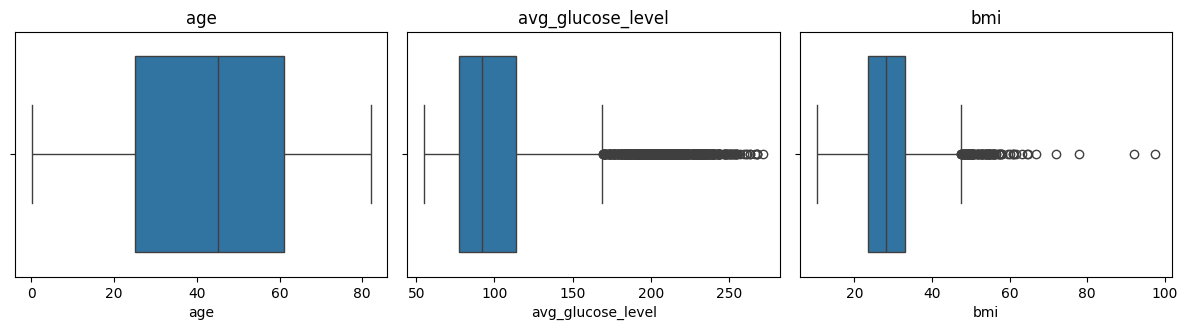

In [19]:
# Menampilkan visualisasi boxplot fitur numerikal
numerical_cols = df_stroke.select_dtypes(include=['float64']).columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_stroke[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [14]:
# total outlier
Q1 = df_stroke[numerical_cols].quantile(0.25)
Q3 = df_stroke[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_stroke[numerical_cols] < (Q1 - 1.5 * IQR)) | (df_stroke[numerical_cols] > (Q3 + 1.5 * IQR))).sum()
print(outliers)

age                    0
avg_glucose_level    627
bmi                  110
dtype: int64


terdapat outlier disini dibagian avg_glucose_level sebanyak 627 dan bmi sebanyak 110, ini perlu penanganan outlier agar data menjadi bersih

### 2.2.4 EDA - Unvariate Analysis

In [20]:
numerical_features = df_stroke.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df_stroke.select_dtypes(include=['object']).columns

        Jumlah sampel  persentase
gender                           
Female           2994   58.590998
Male             2115   41.389432
Other               1    0.019569


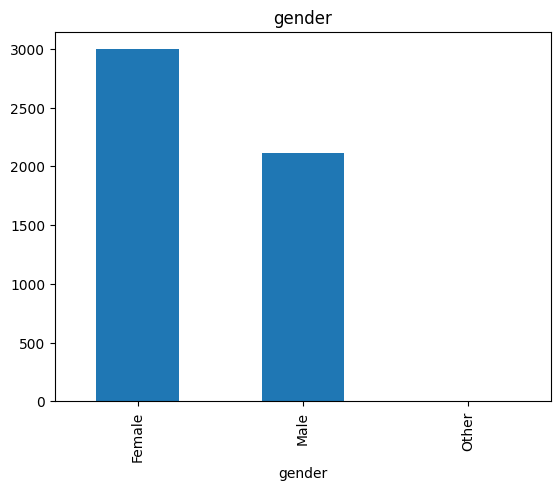

              Jumlah sampel  persentase
ever_married                           
Yes                    3353   65.616438
No                     1757   34.383562


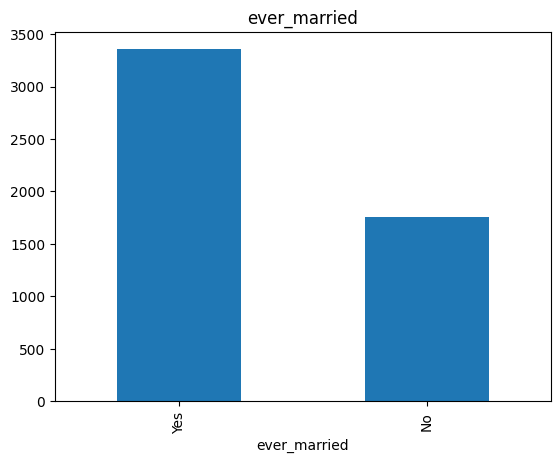

               Jumlah sampel  persentase
work_type                               
Private                 2925   57.240705
Self-employed            819   16.027397
children                 687   13.444227
Govt_job                 657   12.857143
Never_worked              22    0.430528


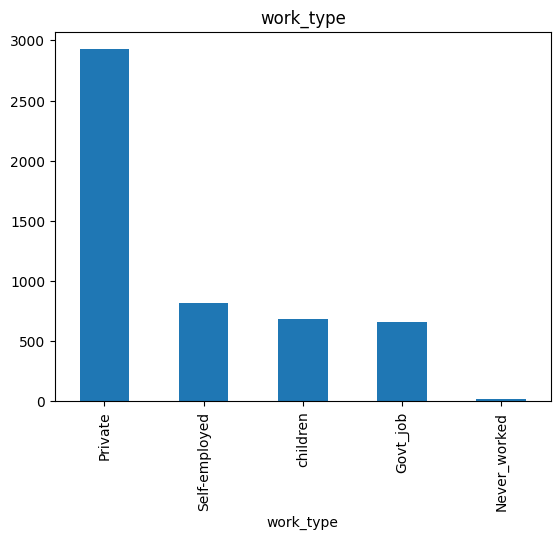

                Jumlah sampel  persentase
Residence_type                           
Urban                    2596   50.802348
Rural                    2514   49.197652


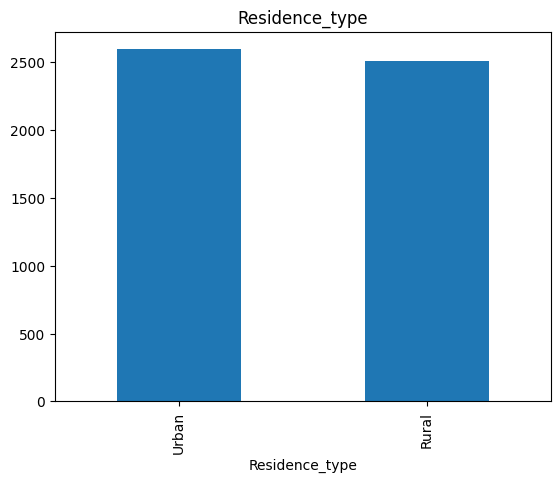

                 Jumlah sampel  persentase
smoking_status                            
never smoked              1892   37.025440
Unknown                   1544   30.215264
formerly smoked            885   17.318982
smokes                     789   15.440313


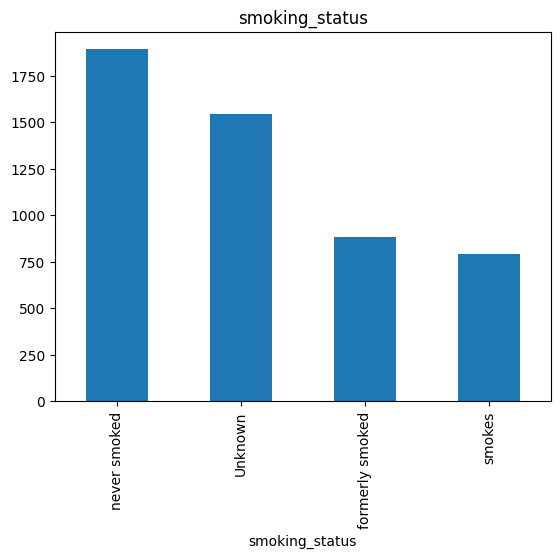

In [21]:
for feature in categorical_features:
  count = df_stroke[feature].value_counts()
  percent = 100*df_stroke[feature].value_counts(normalize=True)
  df_count = pd.DataFrame({'Jumlah sampel':count, 'persentase':percent})
  print(df_count)
  df_count.index.name = feature
  count.plot(kind='bar', title=feature)
  plt.show()

Berdasarkan informasi dari bar chart diatas terdapat persentase sebagai berikut:
* Gender perempuan sebanyak 59% dan laki-laki 40% dan sisanya lainnya.
* Status pernikahan sebanyak 62% sudah menikah sisanya belum menikah
* work_type sebanyak 56% private, 15% children, 14% self-employed 12% Govt_job dan sisanya tidakbekerja
* residence_type sebanyak 50% urban sisanya rural.
* smoking_status sebanyak 35% never_smoked, 32% unkonwn, 15% Formerly smoked dan sisanya smokes.

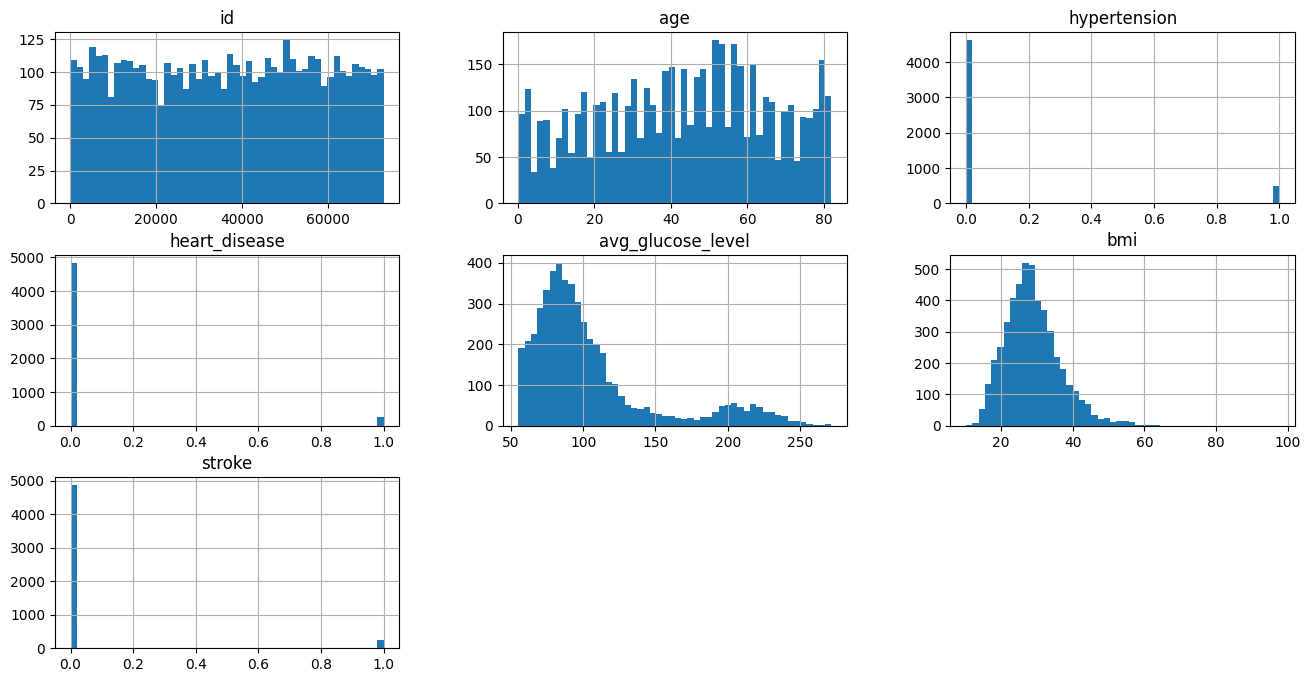

In [22]:
df_stroke[numerical_features].hist(bins=50, figsize=(16,8))
plt.show()

Gambar di atas menunjukkan tiga grafik batang (histogram) yang menggambarkan sebaran data pasien berdasarkan tiga variabel numerik, yaitu:
1. Age(usia):
   * Grafik pertama menunjukkan jumlah pasien berdasarkan kelompok usia.
   * Terlihat bahwa pasien tersebar hampir merata dari usia muda hingga lanjut usia.
   * Tidak ada usia tertentu yang dominan, artinya stroke dapat terjadi pada semua kelompok usia, meskipun jumlah pasien sedikit lebih banyak pada usia 40–60 tahun.
2. Avg Glucose Level (Rata-rata Kadar Gula Darah):
   * Grafik kedua menunjukkan jumlah pasien berdasarkan kadar gula darah rata-rata mereka.
   * Sebagian besar pasien memiliki kadar gula darah antara 80 hingga 100 mg/dL.
   * Semakin tinggi kadar gula darah, jumlah pasiennya semakin sedikit.
   * Ini mengindikasikan bahwa kadar gula yang sangat tinggi lebih jarang, namun tetap penting karena bisa jadi faktor risiko stroke.
3. BMI (Indeks Massa Tubuh):
   * Grafik ketiga menggambarkan jumlah pasien berdasarkan nilai BMI (pengukuran berat badan relatif terhadap tinggi).
   * Mayoritas pasien memiliki BMI antara 25 hingga 30, yang masuk kategori overweight (kelebihan berat badan).
   * Ini menunjukkan bahwa banyak pasien stroke berada dalam rentang berat badan yang tidak ideal, yang dapat menjadi faktor risiko juga

Jadi **Kesimpulan** dari grafik-grafik ini, adalah:
- Pasien stroke datang dari berbagai usia, tapi lebih banyak pada usia paruh baya hingga tua.
- Kadar gula darah dan berat badan yang tidak ideal tampaknya sering ditemukan pada pasien stroke.
- Menjaga kadar gula darah dan berat badan dalam batas normal bisa membantu mengurangi risiko terkena stroke.

### 2.2.5 EDA - Multivariate Analysis

Categorical Feature

<ipython-input-23-a6b5b1667b4e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=feature, y='stroke', data=df_stroke, kind='bar', dodge=False, height=4, aspect=3, palette="Set3")


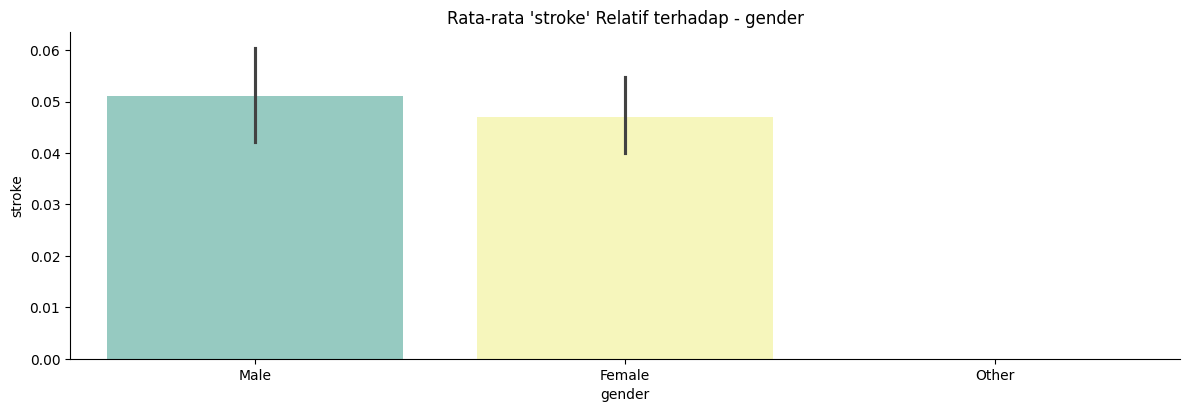

<ipython-input-23-a6b5b1667b4e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=feature, y='stroke', data=df_stroke, kind='bar', dodge=False, height=4, aspect=3, palette="Set3")


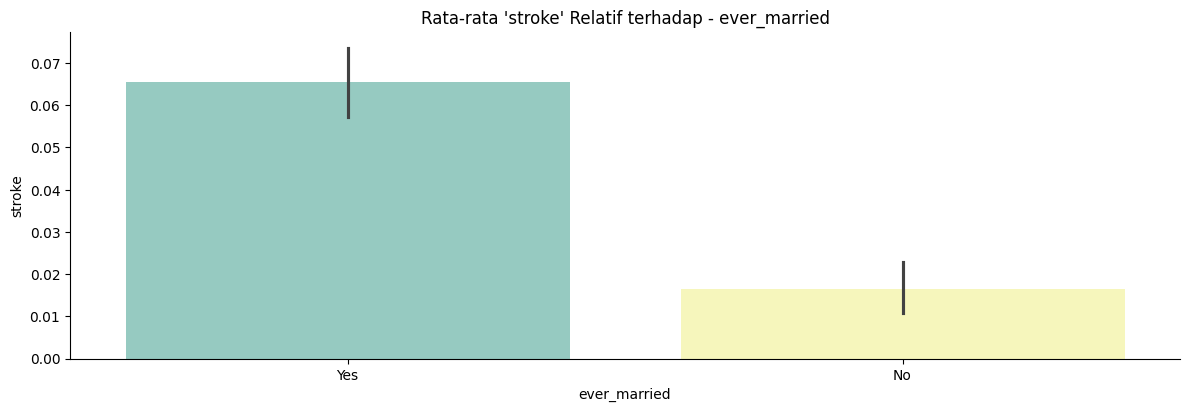

<ipython-input-23-a6b5b1667b4e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=feature, y='stroke', data=df_stroke, kind='bar', dodge=False, height=4, aspect=3, palette="Set3")


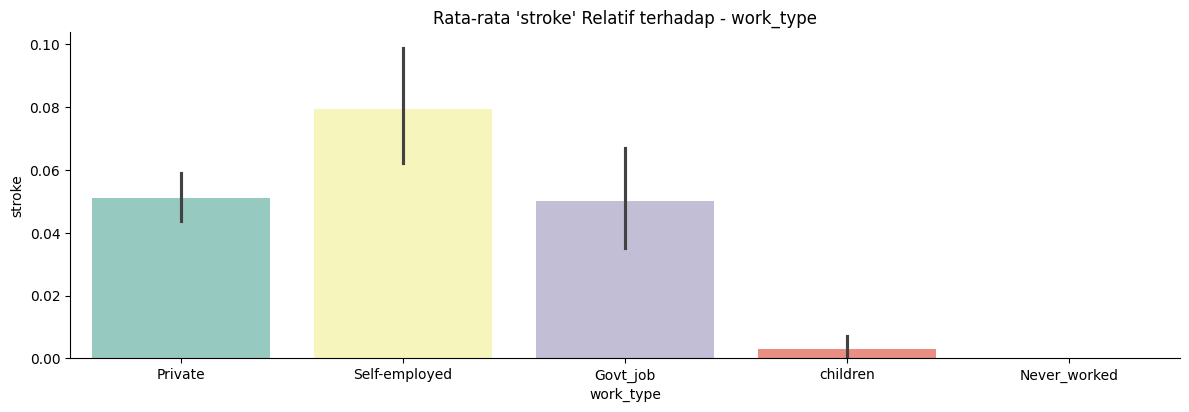

<ipython-input-23-a6b5b1667b4e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=feature, y='stroke', data=df_stroke, kind='bar', dodge=False, height=4, aspect=3, palette="Set3")


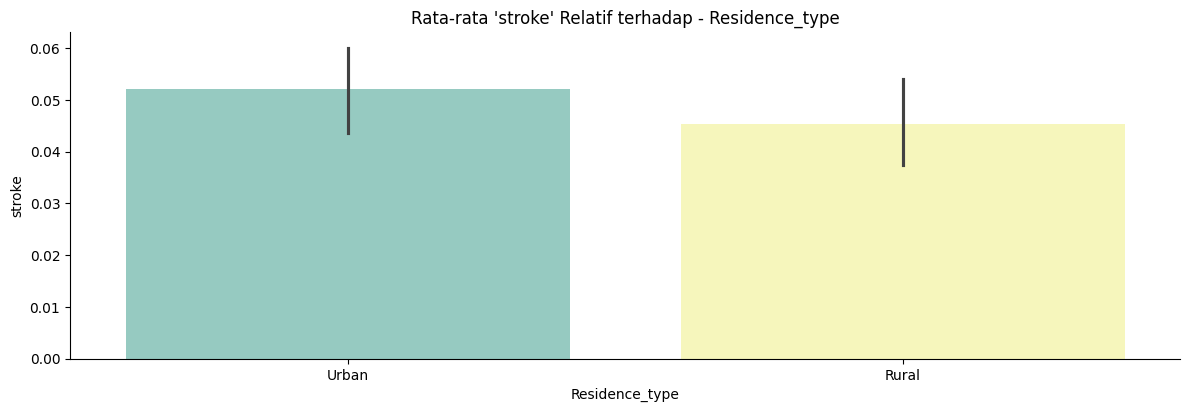

<ipython-input-23-a6b5b1667b4e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=feature, y='stroke', data=df_stroke, kind='bar', dodge=False, height=4, aspect=3, palette="Set3")


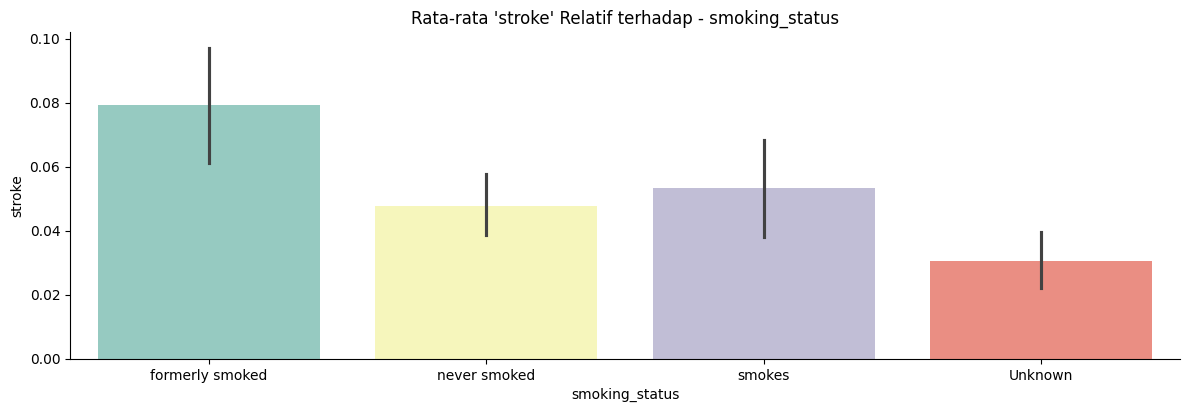

In [23]:
for feature in categorical_features:
  sns.catplot(x=feature, y='stroke', data=df_stroke, kind='bar', dodge=False, height=4, aspect=3, palette="Set3")
  plt.title("Rata-rata 'stroke' Relatif terhadap - {}".format(feature))
  plt.show()

Dengan mengamati rata-rata stroke relatif terhadap fitur kategori diatas, didapatkan *insight* sebagai berikut:
1. Rata-rata stroke terhadap gender cenderung mirip. Rentangnya berada antara 3-3,5%.
2. Rata-rata stroke terhadap ever_merried tertinggi adalah sudah menikah dengan persentase sebesar 4,3%.
3. Rata-rata stroke terhadap work_Type secara umum self_employed dengan persentase sebesar 6.1%
4. Rata-rata stroke terhadap residence_type cendering mirip. Rentangnya berada diantara 3-3,5%
5. Rata-rata stroke terhadap smoking_status secara umum status formerly_smoked lebih tinggi diantara yang lainnya yaitu sekitar 5%.

Numerical Feature

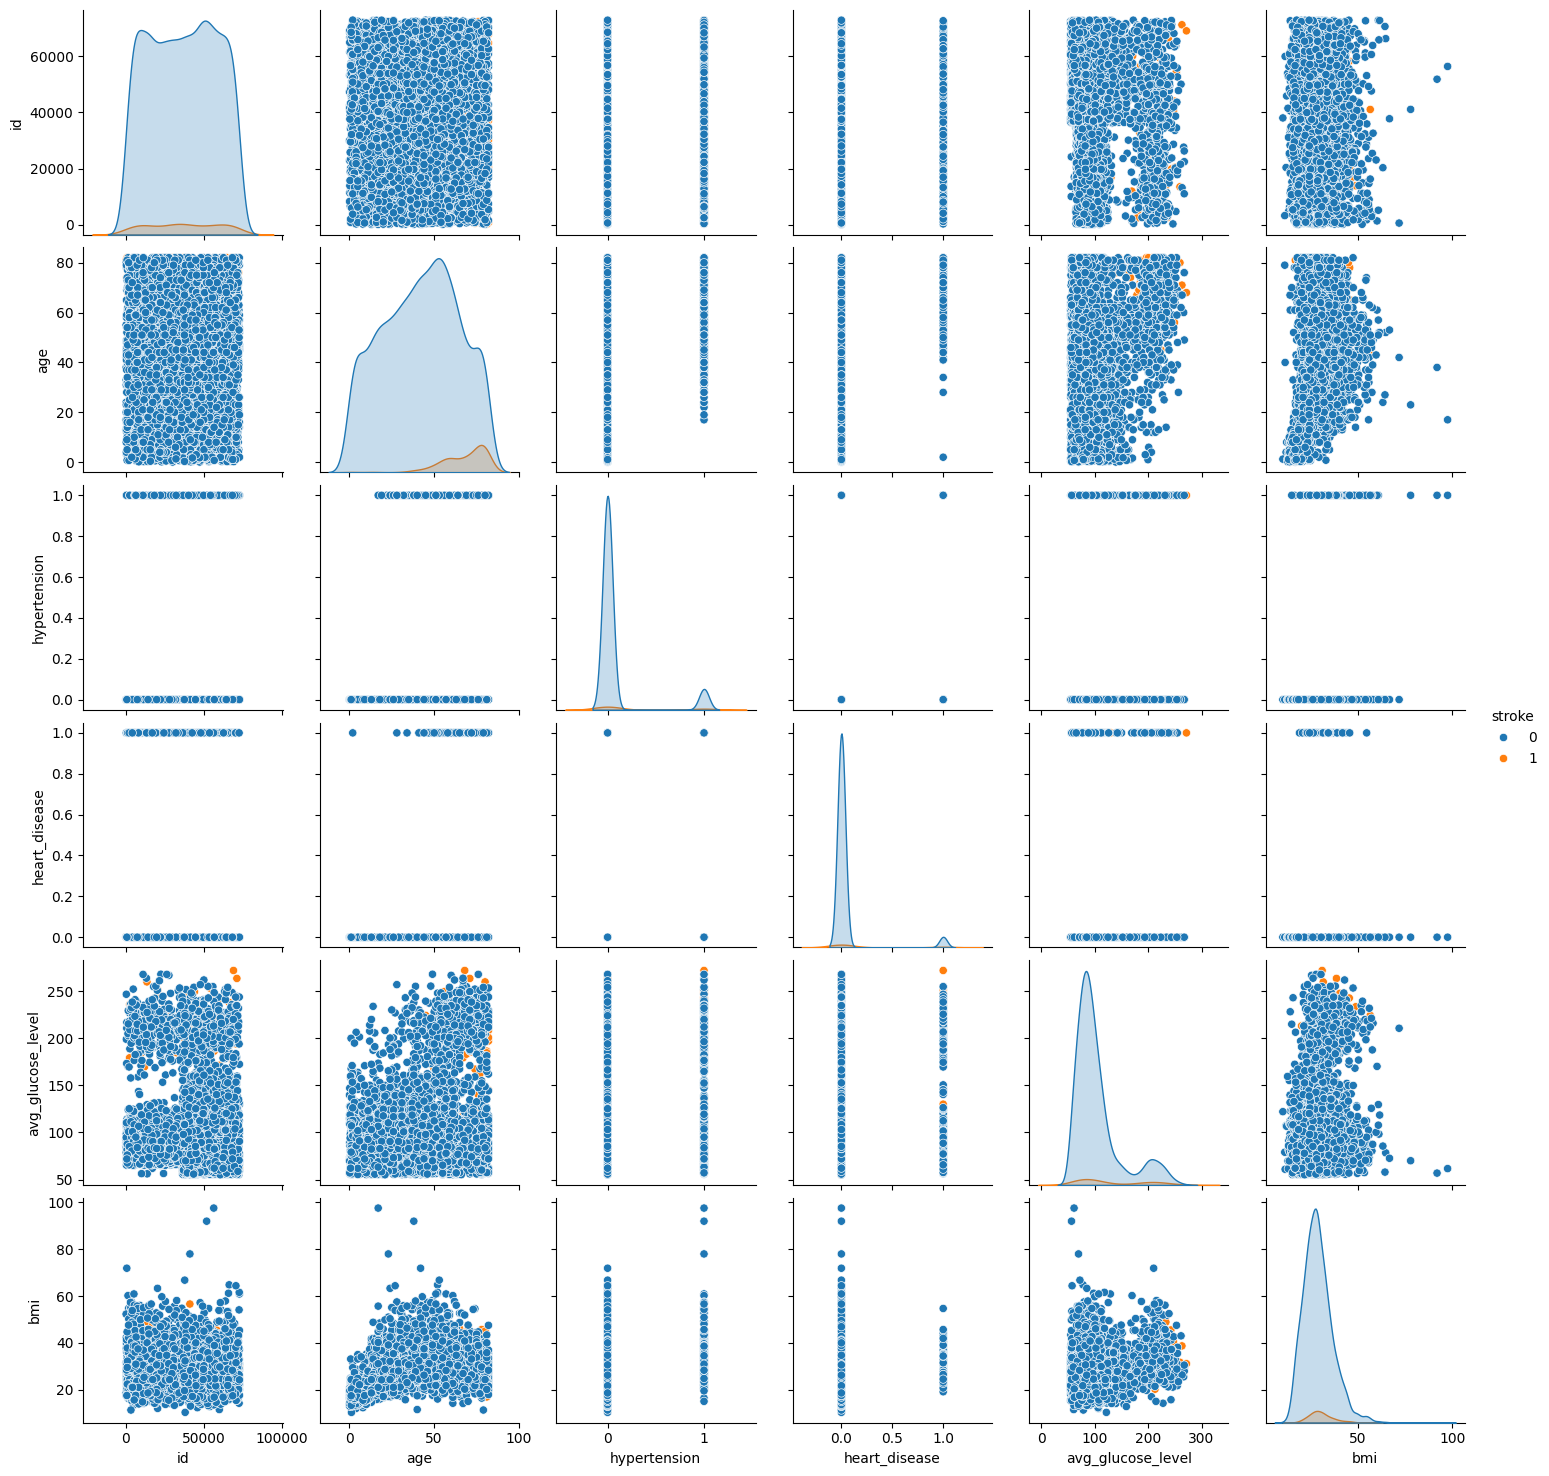

In [24]:
sns.pairplot(df_stroke[numerical_features], hue='stroke')
plt.show()

*Insight* dari gambar pairplot diatas adalah:
* Usia menjadi faktur penting dalam penyakit stroke ini: Stroke lebih banyak terkena pada orang yang lebih tua.
* Glukosa rata-rata tinggi dan hipertensi/jantung juga berkaitan dengan kejadian stroke

Matrix Korelasi

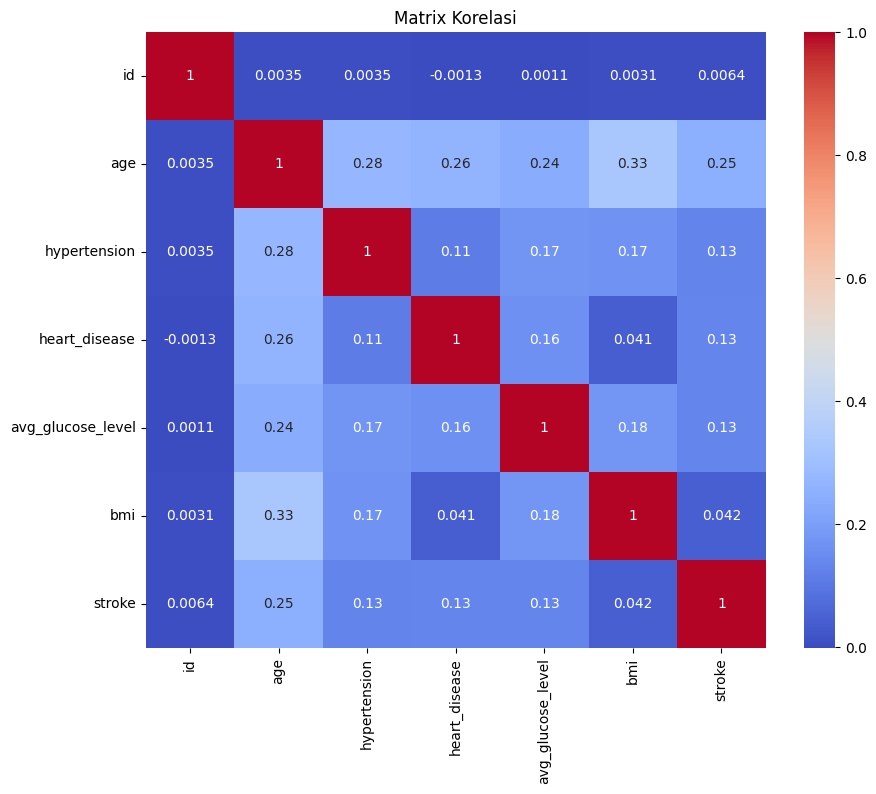

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_stroke[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Matrix Korelasi')
plt.show()

In [26]:
df_stroke[numerical_features].corr()['stroke'].sort_values(ascending=False)[1:]

,stroke
age,0.245257
heart_disease,0.134914
avg_glucose_level,0.131945
hypertension,0.127904
bmi,0.042374
id,0.006388


Kesimpulan untuk proses ini adalah:
1. Data yang tersedia pada dataset ini sebanyak 5110 dengan 12 kolom
2. Data ini masih kotor dan belum siap untuk digunakan dalam pemodelan.
3. Data ini memiliki missing value sebanyak 201 pada kolom bmi, memiliki oulier pada avg_glucose_level sebanyak 627 dan bmi sebanyak 110 dan tidak terdapat nilai yang duplikat.

# 3. Data Preparation

## 3.1 Mengatasi Missing Value, Duplicate dan Outlier

Mengatasi missing value

In [30]:
df_stroke['bmi'].fillna(df_stroke['bmi'].median(), inplace=True)

<ipython-input-30-da3d6067575b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_stroke['bmi'].fillna(df_stroke['bmi'].median(), inplace=True)


In [31]:
df_stroke.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


Data yang memiliki missing value sudah diisi dengan nilai median

mengatasi outlier

In [32]:
df_stroke.shape

(5110, 12)

In [33]:
# Buat filter untuk menghapus baris yang mengandung outlier
filter = ~((df_stroke[numerical_cols] < (Q1 - 1.5 * IQR)) | (df_stroke[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

df_stroke = df_stroke[filter]

df_stroke.shape

(4401, 12)

Outlier sudah diatasi sekarang data total adalah sebanyak 4401

Mengatasi Duplikat

In [34]:
# mengatasi duplikat
df_stroke.drop_duplicates(inplace=True)

<ipython-input-34-8c042ad5b7ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stroke.drop_duplicates(inplace=True)


## 3.2 Encoding Fitur Kategori

Menghilangkan fitur yang tidak diperlukan

In [35]:
# menghapus kolom id
df_stroke = df_stroke.drop(columns=['id'])

In [36]:
for feature in categorical_features:
  print(feature)
  print(df_stroke[feature].unique())

gender
['Male' 'Female' 'Other']
ever_married
['Yes' 'No']
work_type
['Private' 'Govt_job' 'Self-employed' 'children' 'Never_worked']
Residence_type
['Rural' 'Urban']
smoking_status
['never smoked' 'Unknown' 'smokes' 'formerly smoked']


In [37]:
df_encoded = df_stroke.copy()

In [39]:
label_encoder = OneHotEncoder()
df_encoded['gender'] = df_encoded['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
df_encoded['Residence_type'] = label_encoder.fit_transform(df_encoded[['Residence_type']]).toarray()
df_encoded['ever_married'] = label_encoder.fit_transform(df_encoded[['ever_married']]).toarray()
df_encoded['work_type'] = df_encoded['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)
df_encoded['smoking_status'] = df_encoded['smoking_status'].replace({'never smoked':0,'smokes':1,'formerly smoked':2,'Unknown':-1}).astype(np.uint8)
df_encoded

<ipython-input-39-e344cf5f85c4>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['smoking_status'] = df_encoded['smoking_status'].replace({'never smoked':0,'smokes':1,'formerly smoked':2,'Unknown':-1}).astype(np.uint8)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,0,80.0,0,1,1.0,0,0.0,105.92,32.5,0,1
6,0,74.0,1,1,1.0,0,0.0,70.09,27.4,0,1
7,1,69.0,0,0,0.0,0,1.0,94.39,22.8,0,1
8,1,59.0,0,0,1.0,0,0.0,76.15,28.1,255,1
9,1,78.0,0,0,1.0,0,1.0,58.57,24.2,255,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1.0,0,1.0,83.75,28.1,0,0
5106,1,81.0,0,0,1.0,1,1.0,125.20,40.0,0,0
5107,1,35.0,0,0,1.0,1,0.0,82.99,30.6,0,0
5108,0,51.0,0,0,1.0,0,0.0,166.29,25.6,2,0


Proses encoding ini digunakan untuk mengubah data non-numerik menjadi bentuk numerik dengan tujuan:
1. Membuat data dapat diproses oleh algoritma machine learning yang akan digunakan
2. Mempertahankan makna kategorikal dalam bentuk numerik agar informasi tidak hilang ketika dilakukannya perubahan.

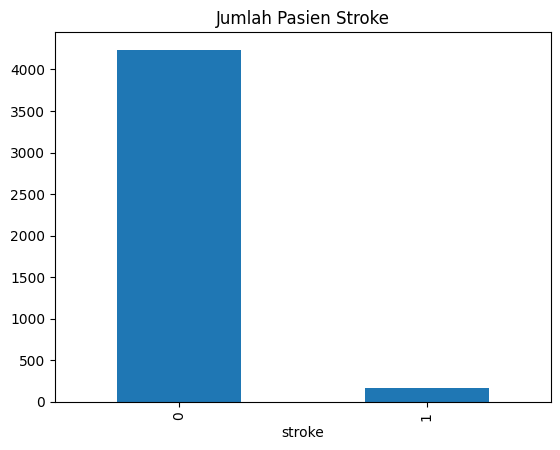

In [40]:
# Visualisasi stroke
df_encoded['stroke'].value_counts().plot(kind='bar', title='Jumlah Pasien Stroke')
plt.show()


## 3.3 Pembagian Data

In [64]:
X = df_encoded[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi', 'smoking_status']]
y = df_encoded['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [65]:
X_test.head()

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status
4466,1,12.0,0,0,255,70.13,17.8,255
2209,0,78.0,1,0,1,75.19,27.6,0
3747,1,21.0,0,0,0,126.35,26.9,0
4106,0,41.0,0,0,2,84.10,29.3,0
3135,0,44.0,1,0,0,84.10,28.1,255


Proses ini digunakan untuk melatih model (training) dan mengukur performa model dengan testing. Untuk kasus ini dilakukan pembagian dengan skala 80% training dan 20 testing

## 3.4 SMOTE

Proses SMOTE ini digunakan untuk mengatasi data yang tidak seimbang, untuk kasus yang sedang diselesaikan dibutuhkan proses ini dikarenakan data untuk orang yang kena stroke dan yang tidak kena, perbandingannya sangat jauh maka diperlukannlah teknik untuk mengatasi ketidakseimbangan tersebut seperti SMOTE.

In [66]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train.ravel())

df_resampled = pd.concat([pd.DataFrame(X_train_resampled), pd.DataFrame(y_train_resampled)], axis=1)

<ipython-input-66-1ec5fa6bc761>:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train.ravel())


In [68]:
df_resampled

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,0
0,1,33.000000,0,0,0,83.160000,20.200000,255,0
1,1,8.000000,0,0,255,120.430000,23.500000,255,0
2,1,23.000000,0,0,0,99.920000,25.800000,0,0
3,1,7.000000,0,0,255,61.420000,20.800000,255,0
4,0,6.000000,0,0,255,131.430000,17.700000,255,0
...,...,...,...,...,...,...,...,...,...
6771,0,58.034403,0,0,0,82.435205,28.165366,1,1
6772,0,79.634930,1,0,0,73.527915,28.607944,0,1
6773,0,48.846406,0,0,2,84.714897,29.897495,0,1
6774,0,62.310460,0,1,0,115.155775,35.499832,1,1


### 3.4.1 Distribusi Data Training Setelah SMOTE

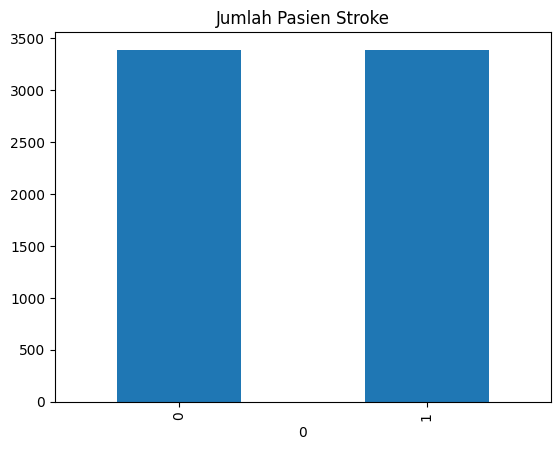

In [69]:
# Visualisasi stroke
df_resampled[0].value_counts().plot(kind='bar', title='Jumlah Pasien Stroke')
plt.show()

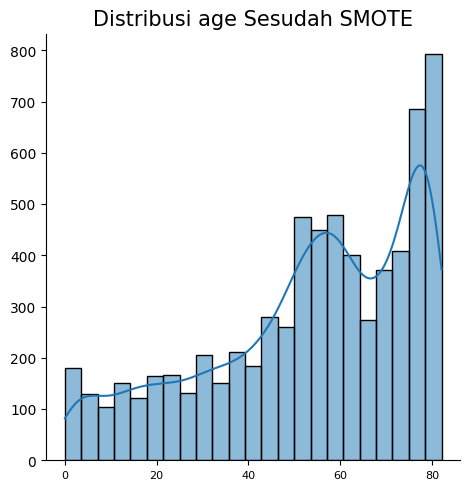

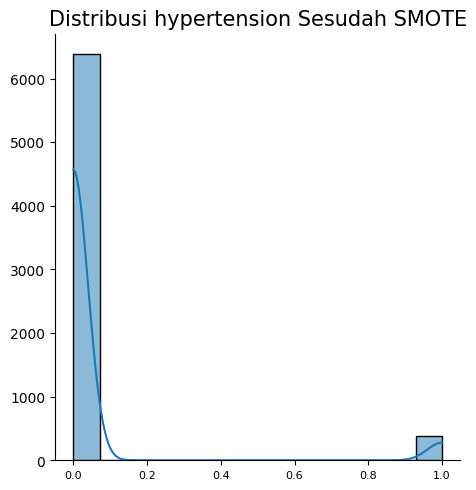

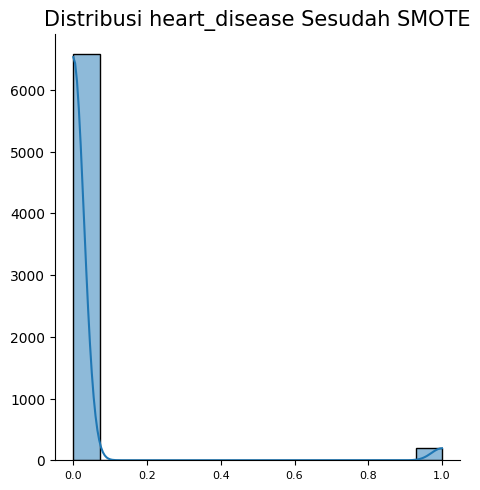

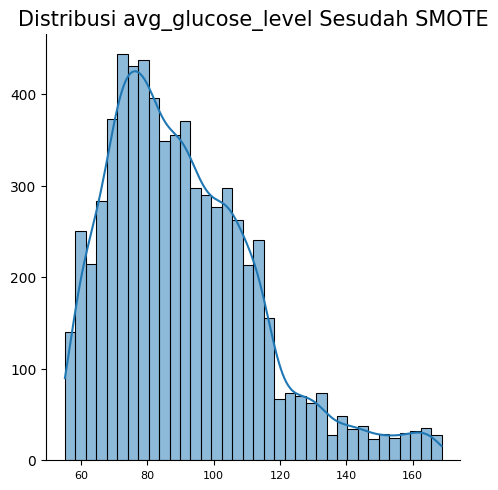

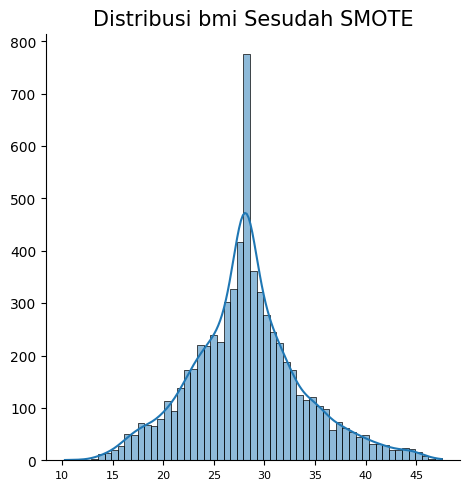

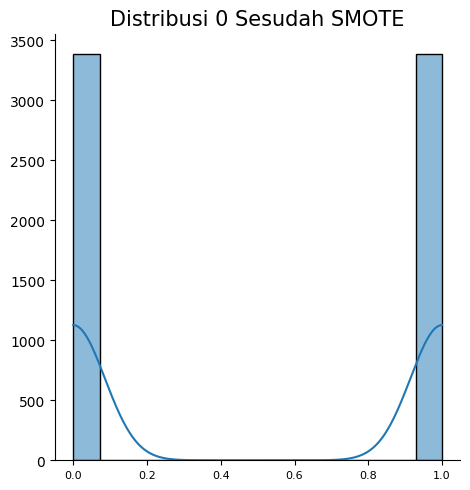

In [71]:
numerical_cols = [col for col in df_resampled.columns if col not in categorical_features]

for i in numerical_cols:
  ax = sns.displot(df_resampled[i], kde=True)
  plt.title(f'Distribusi {i} Sesudah SMOTE', fontsize = 15)
  plt.xlabel('')
  plt.ylabel('')
  plt.xticks(fontsize=8)
  plt.show()

### 3.4.2 Korelasi matriks setelah smote

Text(0.5, 1.0, 'Correlation Matrix')

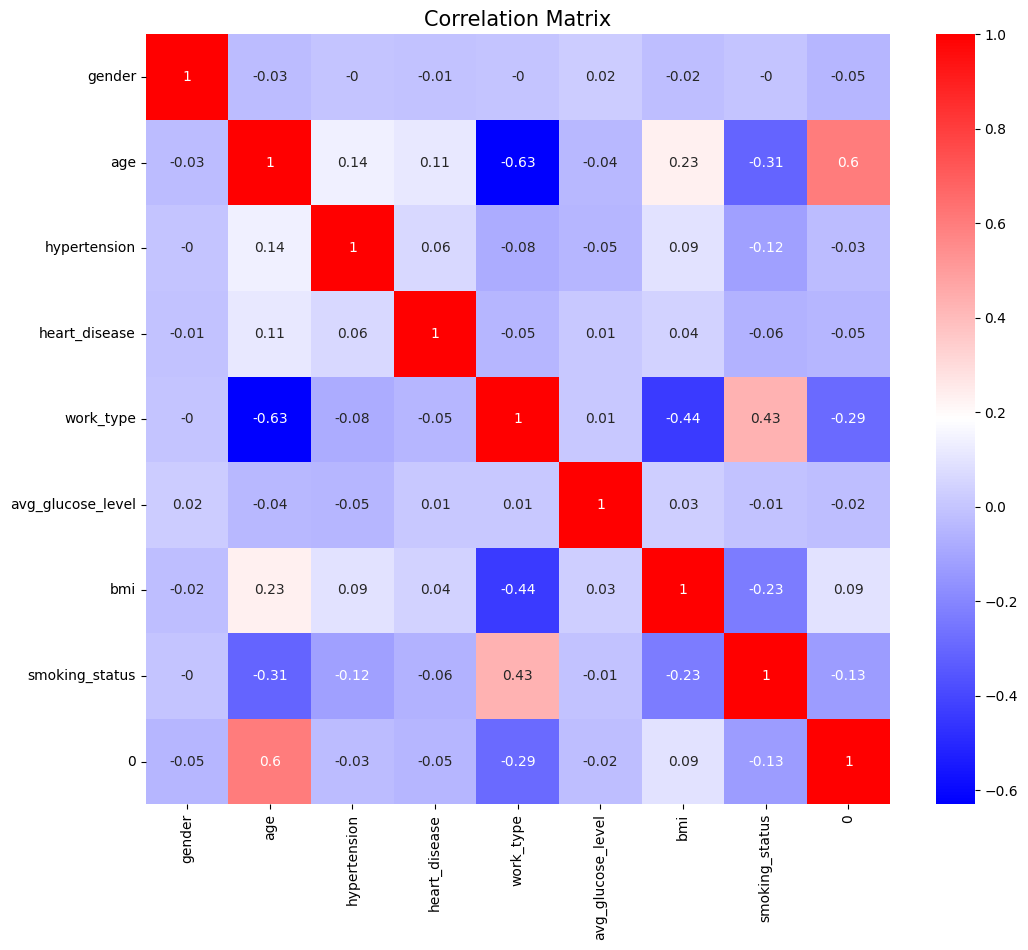

In [72]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_resampled.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')
plt.title('Correlation Matrix', size=15)

In [74]:
df_resampled.corr()[0].sort_values(ascending=False)[1:]

,0
age,0.604427
bmi,0.090812
avg_glucose_level,-0.020873
hypertension,-0.026678
heart_disease,-0.047550
gender,-0.052164
smoking_status,-0.133395
work_type,-0.288328


## 3.5 Standarisasi

In [75]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

Proses ini dibutuhkan ketika melakukan pemodelan dengan Logistic Regression

## 3.6 REduksi Data dengan PCA

In [77]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 4. Modeling

Tahapan ini membahas mengenai model machine learning yang digunakan untuk menyelesaikan permasalahan.

## 4.1 Membangun model klasifikasi baseline untuk prediksi stroke

### 4.1.1 Algoritma Logistic Regression

Logistic Regression adalah algoritma klasifikasi linear yang digunakan untuk memprediksi probabilitas suatu kelas berdasarkan kombinasi linier dari fitur input.

In [78]:
model_lr = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model_lr.fit(X_train_pca, y_train_resampled)

y_pred_lr = model_lr.predict(X_test_pca)

Paramter yang digunakan adalah custom dari parameter default, parameter yang digunakan adalah sebagai berikut:
- `max_iter=1000` digunakan untuk maksimal model melakukan iterasi
- `random_state=42` untuk menetapkan seed untuk generator angka acak
- `class_weight='balanced'` digunakan secara otomatis menyesuaikan bobot antar kelas berdasarkan frekuensinya untuk mengatasi imbalance data


In [80]:
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Akurasi: {accuracy:.4f}")

Akurasi: 0.7412


### 4.1.2 Algoritma Random Forest Classifier

Random Forest adalah algoritma ensemble berbasis decision tree yang membangun banyak pohon keputusan dan menggabungkan hasilnya untuk meningkatkan akurasi dan mengurangi overfitting.

In [82]:
model_rf = RandomForestClassifier(random_state=42, class_weight='balanced')
model_rf.fit(X_train_pca, y_train_resampled)

y_pred_rf = model_rf.predict(X_test_pca)

Paramter yang digunakan adalah custom dari parameter default, parameter yang digunakan adalah sebagai berikut:
- `random_state=42` untuk menetapkan seed untuk generator angka acak
- `class_weight='balanced'` digunakan secara otomatis menyesuaikan bobot antar kelas berdasarkan frekuensinya untuk mengatasi imbalance data


In [83]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi: {accuracy_rf:.4f}")

Akurasi: 0.8842


### 4.1.3.Plot perbandingan accuracy untuk kedua Model

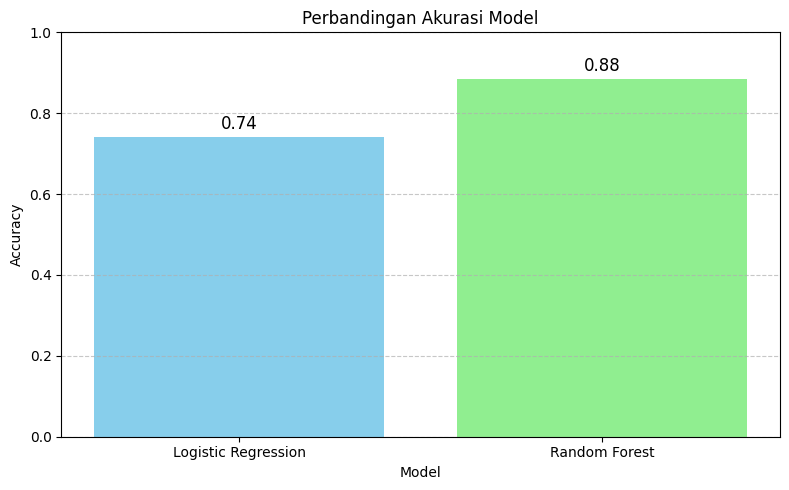

In [84]:
# Plot perbandingan acc model
models = ['Logistic Regression', 'Random Forest']
accuracies = [accuracy, accuracy_rf]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.ylim(0, 1)  # karena akurasi dalam skala 0–1
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

Pada plot ini dapat dilihat bahwa nilai accuracy Logistic Regression lebih rendah dibandingkan dengan Random Forest Classifier, dengan hal ini model Logistic Regression akan dilakukan improvement dengan hyperparameter tuning kemudian dibandingkan kembali dengan XGBoost

## 4.2 Melakukan improvement dengan algoritma yang lebih kompleks

### 4.2.1 Algoritma XGBoost

Extreme Gradient Boosting (XGBoost) adalah algoritma boosting yang sangat efisien dan sering digunakan dalam kompetisi machine learning karena performa tinggi dan kemampuannya menangani dataset besar.

In [85]:
scale = (len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
model_xgb = XGBClassifier(random_state=42, scale_pos_weight=scale)
model_xgb.fit(X_train_pca, y_train_resampled)

y_pred_xgb = model_xgb.predict(X_test_pca)

Parameter yang digunakan adalah custom dari parameter default, parameter yang digunakan adalah sebagai berikut:
- `random_state=42` untuk menetapkan seed untuk generator angka acak
- `scale_pos_weight=scale` digunakan untuk memberikan bobot lebih pada kelas positif (biasanya kelas minoritas), sehingga model lebih memperhatikan kesalahan pada kelas tersebut


In [86]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Akurasi: {accuracy_xgb:.2f}')

Akurasi: 0.81


### 4.2.2 Hyperparameter Tunning XGBosst dan Random Forest Classifier dengan Random Search

#### XGBoost dengan Random Search

In [89]:
# Parameter space
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [1, 5, 10],
    'reg_alpha': [0, 0.5, 1]
}

random_search_xgb = RandomizedSearchCV(
    model_xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search_xgb.fit(X_train_pca, y_train_resampled)

print("Best Parameters:", random_search_xgb.best_params_)
print("Best Accuracy:", random_search_xgb.best_score_)
best_acc_xgb = random_search_xgb.best_score_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 1.0, 'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 1.0}
Best Accuracy: 0.9033368216599861


Parameter yang digunakan adalah sebagai berikut:
- `n_estimators`: Jumlah boosting rounds.
- `max_depth`: Kedalaman maksimum pohon.
- `learning_rate`: Ukuran langkah pembaruan bobot.
- `subsample`: Proporsi data untuk setiap pohon.
- `colsample_bytree`: Proporsi fitur yang digunakan untuk setiap pohon.
- `scale_pos_weight`: Rasio penyesuaian kelas positif dan negatif (penting untuk data tidak seimbang).

### 4.1.3.Plot perbandingan accuracy untuk kedua Model

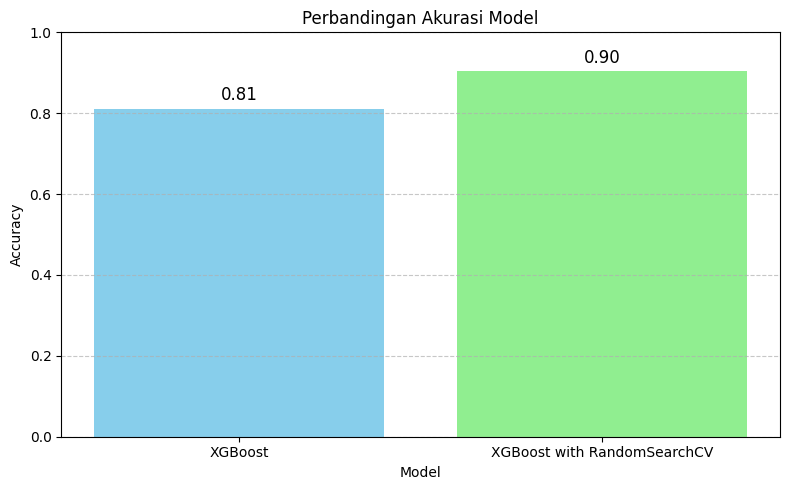

In [118]:
# Plot perbandingan acc model
models = ['XGBoost', 'XGBoost with RandomSearchCV']
accuracies = [accuracy_xgb, best_acc_xgb]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.ylim(0, 1)
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

Berdasarkan grafik diatas menunjukan bahwa nilai acc setelah dilakukan hyperparameter tuning pada model Random Forest Classifier dan XGBoost kedua berada pada nilai 90%. Namun, Random Forest lebih besar dengan nilai acc 93%

# 5. Evaluasi

## 5.1 Evaluasi model baseline

In [93]:
print("Logistic Regression Evaluation:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Evaluation:
[[630 218]
 [ 10  23]]
              precision    recall  f1-score   support

           0       0.98      0.74      0.85       848
           1       0.10      0.70      0.17        33

    accuracy                           0.74       881
   macro avg       0.54      0.72      0.51       881
weighted avg       0.95      0.74      0.82       881



In [94]:
print("Random Forest Classifier Evaluation:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Decision Tree Evaluation:
[[770  78]
 [ 24   9]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       848
           1       0.10      0.27      0.15        33

    accuracy                           0.88       881
   macro avg       0.54      0.59      0.54       881
weighted avg       0.94      0.88      0.91       881



In [95]:
# Classification report untuk LR
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
# Classification report untuk RF
report_dt = classification_report(y_test, y_pred_rf, output_dict=True)

In [96]:
# Ambil metrik untuk kelas 0 dan 1
metrics = ['precision', 'recall', 'f1-score']
classes = ['0', '1']

data = []

for cls in classes:
    for metric in metrics:
        data.append({
            'Model': 'Logistic Regression',
            'Class': cls,
            'Metric': metric,
            'Score': report_lr[cls][metric]
        })
        data.append({
            'Model': 'Decision Tree',
            'Class': cls,
            'Metric': metric,
            'Score': report_dt[cls][metric]
        })

df_plot = pd.DataFrame(data)

<ipython-input-97-d6f79079d1d3>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_plot, x='Metric', y='Score', hue='Model', ci=None, palette='Set2', dodge=True)


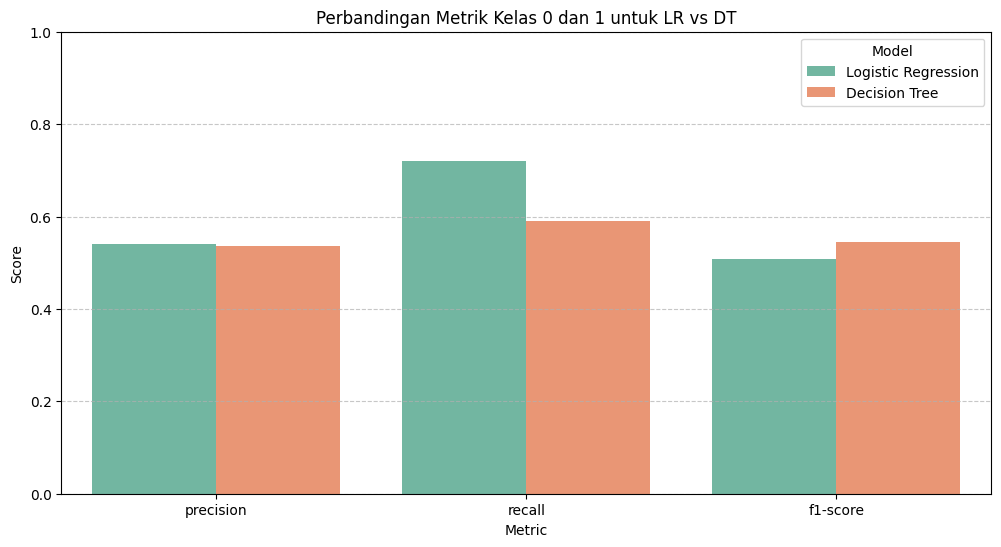

In [97]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='Metric', y='Score', hue='Model', ci=None, palette='Set2', dodge=True)
plt.title('Perbandingan Metrik Kelas 0 dan 1 untuk LR vs DT')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 5.2 Evaluasi Model Algoritma Kompleks XGBoost

In [124]:
print("XGBoost Evaluation:")
y_proba_xgb = model_xgb.predict_proba(X_test_pca)[:, 1]
threshold = 0.2
y_pred_threshold = (y_proba_xgb >= threshold).astype(int)

print("XGBoost Evaluation with Custom Threshold:")
print(confusion_matrix(y_test, y_pred_threshold))
print(classification_report(y_test, y_pred_threshold))

XGBoost Evaluation:
XGBoost Evaluation with Custom Threshold:
[[649 199]
 [ 13  20]]
              precision    recall  f1-score   support

           0       0.98      0.77      0.86       848
           1       0.09      0.61      0.16        33

    accuracy                           0.76       881
   macro avg       0.54      0.69      0.51       881
weighted avg       0.95      0.76      0.83       881



## 5.3 Evaluasi XGBoost dengan Hyperparameter Tuning

In [123]:
# Classification Report
best_xgb_model = random_search_xgb.best_estimator_
y_proba_xgb = best_xgb_model.predict_proba(X_test_pca)[:, 1]
threshold = 0.9
y_pred_threshold_xgb_rf = (y_proba_xgb >= threshold).astype(int)

print("XGBoost Evaluation with Custom Threshold:")
print(confusion_matrix(y_test, y_pred_threshold_xgb_rf))
print(classification_report(y_test, y_pred_threshold_xgb_rf))

XGBoost Evaluation with Custom Threshold:
[[775  73]
 [ 24   9]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       848
           1       0.11      0.27      0.16        33

    accuracy                           0.89       881
   macro avg       0.54      0.59      0.55       881
weighted avg       0.94      0.89      0.91       881



In [115]:
# Classification report untuk LR
report_xgb = classification_report(y_test, y_pred_threshold, output_dict=True)
# Classification report untuk RF
report_xgb_rs = classification_report(y_test, y_pred_threshold_xgb_rf, output_dict=True)

In [119]:
# Ambil metrik untuk kelas 0 dan 1
metrics = ['precision', 'recall', 'f1-score']
classes = ['0', '1']

data = []

for cls in classes:
    for metric in metrics:
        data.append({
            'Model': 'XGBoost',
            'Class': cls,
            'Metric': metric,
            'Score': report_xgb[cls][metric]
        })
        data.append({
            'Model': 'DXGBoost with RandomSearchCV',
            'Class': cls,
            'Metric': metric,
            'Score': report_xgb_rs[cls][metric]
        })

df_plot = pd.DataFrame(data)

<ipython-input-121-6d24a6cdfaa4>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_plot, x='Metric', y='Score', hue='Model', ci=None, palette='Set2', dodge=True)


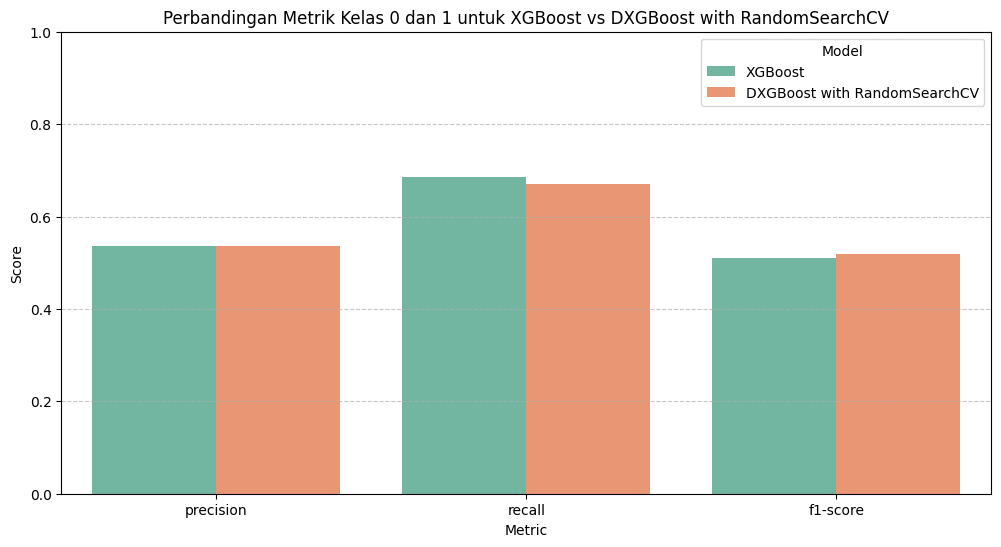

In [121]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='Metric', y='Score', hue='Model', ci=None, palette='Set2', dodge=True)
plt.title('Perbandingan Metrik Kelas 0 dan 1 untuk XGBoost vs DXGBoost with RandomSearchCV')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Kesimpulan dari evaluasi yang didapatkan adalah sebagai berikut:
1. Model yang diimplementasikan menggunakan algoritma logistic regression dan random forest classifier telah diimplementasian, model yang memiliki nilai akurasi lebih besar adalah random forest classifier 88% dalam hal ini model dapat digunakan untuk melakukan prediksi stroke dengan cukup baik.
2. Model yang lebih kompleks ternyata cukup baik untuk peningkatan nilai akurasi, seperti halnya implementasi algoritma xgboost dengan tambahan hyper parameter tuning randomforest classifier mendapat nilai akurasi sebesar 90%. Maka dalam melakukan prediksi penyakit stroke algoritma ini cukup mumpuni untuk diimplementasikan.
3. Melakukan  feature engineering pada kasus ini membantu dalam melakukan prose modeling yang mana proses ini berperan penting untuk mendapatkan nilai akurasi yang tinggi.